In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, pearsonr


In [2]:
rfm = pd.read_csv(r"/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/clustered_customers.csv")


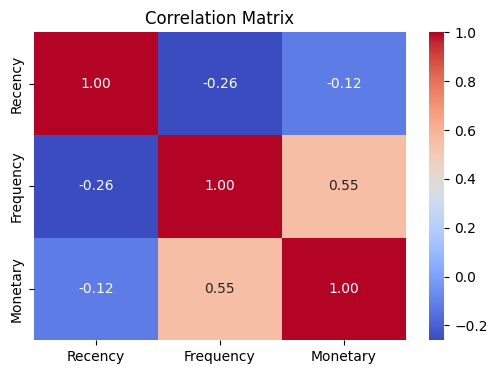

In [3]:
#Correlation Analysis
corr = rfm[['Recency', 'Frequency', 'Monetary']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [4]:
#Hypothesis Testing Example 1
# H0: High frequency buyers do not spend more than low frequency buyers
median_freq = rfm['Frequency'].median()
high_freq = rfm[rfm['Frequency'] > median_freq]['Monetary']
low_freq = rfm[rfm['Frequency'] <= median_freq]['Monetary']




In [5]:
stat, p_value = ttest_ind(high_freq, low_freq, equal_var=False)
print(f"T-test p-value (High vs Low Frequency buyers): {p_value:.4f}")


T-test p-value (High vs Low Frequency buyers): 0.0000


In [6]:
if p_value < 0.05:
    print("Result: Statistically significant - High frequency buyers spend more.")
else:
    print("Result: Not statistically significant.")


Result: Statistically significant - High frequency buyers spend more.


In [7]:
#Hypothesis Testing Example 2 (Chi-Square on Cluster vs Recency Category)
# Categorize Recency into bins
rfm['RecencyCategory'] = pd.qcut(rfm['Recency'], q=4, labels=['Recent', 'MidRecent', 'Old', 'VeryOld'])
crosstab = pd.crosstab(rfm['Cluster'], rfm['RecencyCategory'])
chi2, p, dof, ex = chi2_contingency(crosstab)

print(f"Chi-Square p-value (Cluster vs Recency Category): {p:.4f}")

if p < 0.05:
    print("Result: Significant relationship between cluster and recency category.")
else:
    print("Result: No significant relationship.")


Chi-Square p-value (Cluster vs Recency Category): 0.0000
Result: Significant relationship between cluster and recency category.


In [8]:
crosstab.to_csv("/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/cluster_vs_recency_category.csv")
